## Module Placement Algorithm

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import shapely
from shapely import Point
from shapely.affinity import rotate, translate

In [2]:
roof = [
    {
        "x": 872.5026975798373,
        "y": 625.7414298352895
    },
    {
        "x": 442.5233711108871,
        "y": 675.2486443967465
    },
    {
        "x": 459.57598163441736,
        "y": 838.4664879791068
    },
    {
        "x": 788.1723154108191,
        "y": 801.7568158133508
    },
    {
        "x": 775.2999242413591,
        "y": 702.7384222021205
    },
    {
        "x": 875.604035686002,
        "y": 686.5276567161176
    },
    {
        "x": 872.5026975798373,
        "y": 625.7414298352895
    }
]

In [3]:
roof_pts = [[pt['x'], pt['y']] for pt in roof]

In [4]:
roof_pts

[[872.5026975798373, 625.7414298352895],
 [442.5233711108871, 675.2486443967465],
 [459.57598163441736, 838.4664879791068],
 [788.1723154108191, 801.7568158133508],
 [775.2999242413591, 702.7384222021205],
 [875.604035686002, 686.5276567161176],
 [872.5026975798373, 625.7414298352895]]

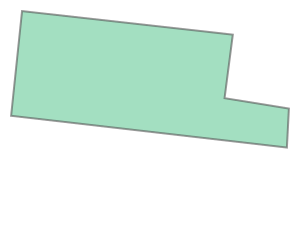

In [5]:
roof_polygon = shapely.polygons(roof_pts)
roof_polygon

```
1.We need a map of actual roof to the fireset back of the roof
Make a mapping of the side to the firesetback 

```

In [6]:
ridge = [
    [
        890.4063957361758,
        604.5969353764157
    ],
    [
        421.7188540972685,
        658.5609593604264
    ]
]

In [7]:
def calc_slope(line):
    y2_y1 = line[1][1]-line[0][1]
    x2_x1 = line[1][0]-line[0][0]
    return np.arctan(y2_y1/x2_x1)

In [8]:
def extract_x_y(line_pts):
    line_pts = np.array(line_pts)
    return line_pts[:, :1].flatten(), line_pts[:, 1:].flatten()

In [9]:
ridge_line = shapely.LineString(ridge)

In [10]:
ridge_angle = calc_slope(ridge)

In [11]:
x, y = extract_x_y(roof_pts)

In [12]:
import numpy as np

In [13]:
# nx,ny = (3,2)
# # x = np.linspace(0, 1, nx)
# # y = np.linspace(0, 1, ny)
# xv, yv = np.meshgrid(x,y)

# import matplotlib.pyplot as plt
# plt.plot(xv, yv, marker='o', color='k', linestyle='-')
# plt.show()

In [14]:
roof_polygon1 = rotate(roof_polygon, ridge_angle, use_radians=True)

In [15]:
from shapely.prepared import prep


polygon = roof_polygon
latmin, lonmin, latmax, lonmax = polygon.bounds
x1, y1, x2, y2 = polygon.bounds




# new_bounds = shapely.LineString([[x1, x2], [0,0]])
# new_bounds1 = shapely.LineString([[0,0], [y1,y2]])

# # new_bounds1 = rotate(shapely.LineString([[0,0], [y1,y2]]), ridge_angle, use_radians=True)


# # latmin, latmax, lonmin, lonmax = new_bounds.bounds


# # # create prepared polygon
prep_polygon = prep(polygon)

# # # construct a rectangular mesh
# # points = []

# # lat_res = 50
# # lon_res = 30


# # for lat in np.arange(latmin, latmax, lat_res):
# #     for lon in np.arange(lonmin, lonmax, lon_res):
# #         points.append(Point((round(lat,3), round(lon,3))))

# # # validate if each point falls inside shape using
# # valid_points = []
# # # the prepared polygon
# # valid_points.extend(filter(prep_polygon.contains, points))

## finding the x and y axis and then we need to translate them with respect to the ridge angle

In [16]:
# we need two lines the 
# origin (x1, y1)
# l1 = (x1,  y1), (x1, y2)
# l2 = (x1, y1), (x2, y1)

l1 = shapely.LineString([[x1, x1], [y1, y2]])
l2 = shapely.LineString([[x1, x2], [y1, y1]])

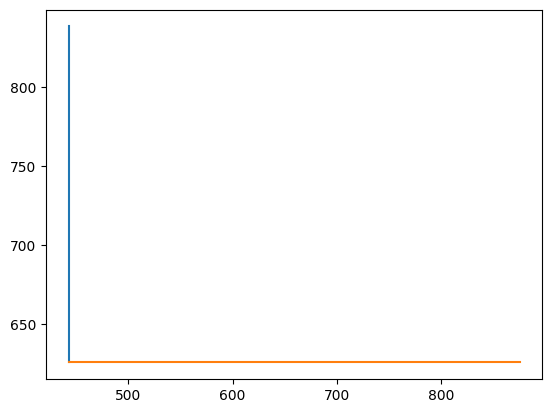

In [17]:
plt.plot([x1, x1], [y1, y2])
plt.plot([x1, x2], [y1, y1])

## Rotating of lines

In [18]:
P1 = shapely.Point(x1, y1) ## origin
P2 = shapely.Point(x1, y2)
P3 = shapely.Point(x2, y1)
P4 = shapely.Point(x2, y2)

In [19]:
new_poly = rotate(shapely.Polygon([P1, P2, P3, P4]), ridge_angle, use_radians=True)

## Lower Triangle

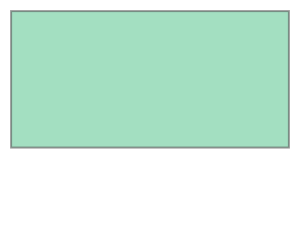

In [20]:
lt = shapely.Polygon([P2, P1, P3, P4])

lt_rotated = rotate(lt, ridge_angle, use_radians=True)
lt

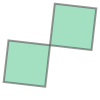

In [21]:
a = [(0, 0), (0, 1), (1, 1), (1, 0), (0, 0)]
b = [(1, 1), (1, 2), (2, 2), (2, 1), (1, 1)]
a = shapely.Polygon(a)
b = shapely.Polygon(b)
rotate(shapely.MultiPolygon([a,b]), ridge_angle, use_radians=True)


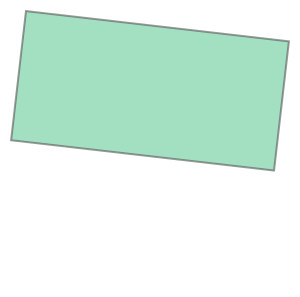

In [22]:
lt_rotated

In [23]:
minx, miny, _, _ = lt_rotated.bounds

## getting back the translated points

In [24]:
# try prininting one by one to inspect why the complex operations were performed ;)
rotated_points = np.array(lt_rotated.boundary.coords.xy)[:, :4].T
rotated_points

array([[456.11063763, 862.53691561],
       [431.7785269 , 651.20802797],
       [862.01676917, 601.67100221],
       [886.3488799 , 812.99988984]])

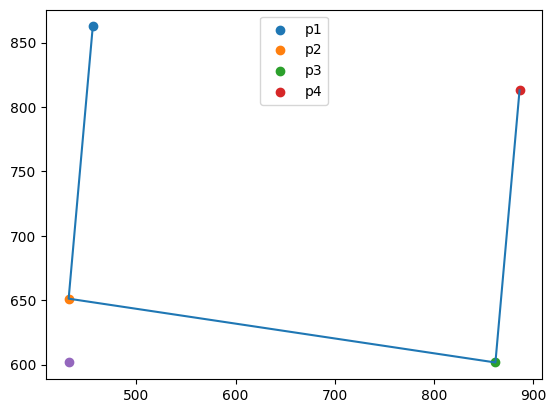

In [25]:
plt.plot(extract_x_y(rotated_points)[0],extract_x_y(rotated_points)[1])
plt.scatter(rotated_points[0][0], rotated_points[0][1], label="p1")
plt.scatter(rotated_points[1][0], rotated_points[1][1], label="p2")
plt.scatter(rotated_points[2][0], rotated_points[2][1], label="p3")
plt.scatter(rotated_points[3][0], rotated_points[3][1], label="p4")


plt.scatter(minx, miny)
plt.legend()

In [26]:
P1_r = shapely.Point(rotated_points[0])
P2_r = shapely.Point(rotated_points[1])
P3_r = shapely.Point(rotated_points[2])


In [27]:
def calc_poi(line_1, line_2):
    line_1 = np.array(line_1)
    line_2_x, line_2_y = extract_x_y(line_2)

    line_2 = np.array(line_2)
    line_1_x, line_1_y = extract_x_y(line_1)

    line_2_dx = line_2_x[1] - line_2_x[0]
    line_2_dy = line_2_y[1] - line_2_y[0]

    line_1_dx = line_1_x[1] - line_1_x[0]
    line_1_dy = line_1_y[1] - line_1_y[0]

    line_2_slope = line_2_dy / line_2_dx
    line_1_slope = line_1_dy / line_1_dx

    line_1_c = line_1_y[0] - (line_1_slope * line_1_x[0])
    line_2_c = line_2_y[0] - (line_2_slope * line_2_x[0])

    x = (line_1_c - line_2_c) / (line_2_slope - line_1_slope)
    y = (line_2_slope*x) + line_2_c

    return x, y


def calc_distance_bwn_2_pts(line_pts: list) -> int:
    """Takes input of points [[x1,y1], [x2,y2] ]"""
    dist = ( (line_pts[1][0] - line_pts[0][0])**2 + (line_pts[1][1] - line_pts[0][1])**2 )**0.5
    return dist


def calc_ratio(short_distance, len_of_line):
    return short_distance / len_of_line

def get_points_at_eq_distance(st_line_pts, distance_bwn_pts_px):
    POINTS = []

    len_of_ridge = calc_distance_bwn_2_pts(st_line_pts)
    no_of_points = int(len_of_ridge // distance_bwn_pts_px)
    initial_distance = distance_bwn_pts_px

    for i in range(no_of_points):
        ratio_i = calc_ratio(initial_distance, len_of_ridge)
        u = st_line_pts[0][0] + ratio_i * (st_line_pts[1][0] - st_line_pts[0][0])
        v = st_line_pts[0][1] + ratio_i * (st_line_pts[1][1] - st_line_pts[0][1])
        initial_distance += distance_bwn_pts_px
        POINTS.append((u, v))

    return {"points": POINTS, "count": no_of_points}

def calc_perpendicular(ridge_pts, rafter_pt, D):
# def calc_perpendicular(x1, y1, x2, y2, Px1, Py1, D):
    x1, y1 = ridge_pts[0][0], ridge_pts[0][1]
    x2, y2 = ridge_pts[1][0], ridge_pts[1][1]
    Px1, Py1 = rafter_pt[0], rafter_pt[1]
    
    ABx = x2 - x1
    ABy = y2 - y1
    
    # Normalize the direction vector
    length_AB = (ABx**2 + ABy**2)**0.5
    ux = ABx / length_AB
    uy = ABy / length_AB
    
    # Perpendicular vector
    vx = -uy
    vy = ux
    
    # Calculate the coordinates of point Q at distance D from P
    Qx1 = Px1 + D * vx
    Qy1 = Py1 + D * vy
    
    return Qx1, Qy1

In [28]:
horizontail_splits = get_points_at_eq_distance([rotated_points[1], rotated_points[2]], 20)['points']
vertical_splits = get_points_at_eq_distance([rotated_points[0], rotated_points[1]], 20)['points']
vertical_opp_splits = get_points_at_eq_distance([rotated_points[2],  rotated_points[3]], 20)['points']

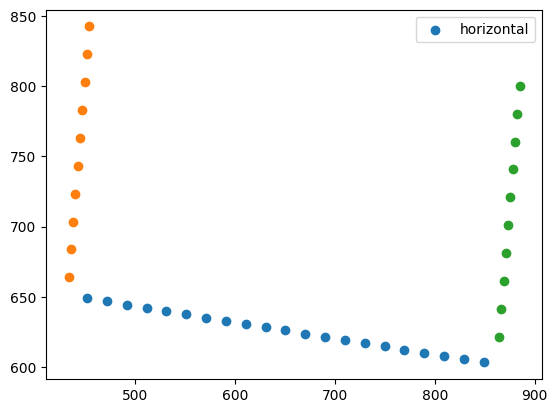

In [29]:
t_x, t_y = extract_x_y(horizontail_splits)
t1_x, t1_y = extract_x_y(vertical_splits)
t2_x, t2_y = extract_x_y(vertical_opp_splits)
plt.scatter(t_x, t_y, label="horizontal")
plt.scatter(t1_x, t1_y)
plt.scatter(t2_x, t2_y)

plt.legend()


In [30]:
POINTS = []
for i in horizontail_splits:
    for j in vertical_splits:
        POINTS.append((round(i[0],3), round(j[1],3)))

for i in horizontail_splits:
    for j in vertical_opp_splits:
        p = (round(i[0],3), round(j[1],3))
        if p not in POINTS:
            POINTS.append((round(i[0],3), round(j[1],3)))

In [31]:
p_x, p_y = extract_x_y(POINTS)

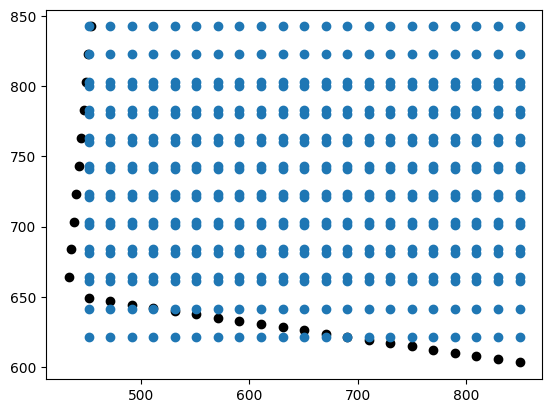

In [32]:
t_x, t_y = extract_x_y(horizontail_splits)
t1_x, t1_y = extract_x_y(vertical_splits)
plt.scatter(t_x, t_y, c="k")
plt.scatter(t1_x, t1_y, c="k")
plt.scatter(p_x, p_y)



In [33]:
# l1 = extract_x_y(new_bounds.xy)
# l2 = extract_x_y(new_bounds1.xy)

# # plt.plot(l1[0], l1[1])
# # plt.plot(l2[0], l2[1])
# # plt.scatter(x2, y2)
# # plt.scatter(x1, y1)
# plt.scatter(x1, y2, label="p3")
# plt.scatter(x2, y1, label="p4")
# plt.legend()


# # x1, y1, x1, y2
# # x1, y1, x2, y1

In [34]:
bounding_rect = [
    [x2, y2],
    [x2, y1],
    [x1, y1],
    [x1, y2]
]

In [35]:
bounding_rect_genom = shapely.Polygon(bounding_rect)

In [36]:
bounding_rect_genom_rotated = rotate(bounding_rect_genom, ridge_angle, use_radians=True)

In [37]:
bounding_rect_genom_rotated.boundary.coords.xy

(array('d', [886.3488798960739, 862.0167691660627, 431.7785269008154, 456.1106376308264, 886.3488798960739]),
 array('d', [812.9998898445448, 601.671002207968, 651.2080279698515, 862.5369156064284, 812.9998898445448]))

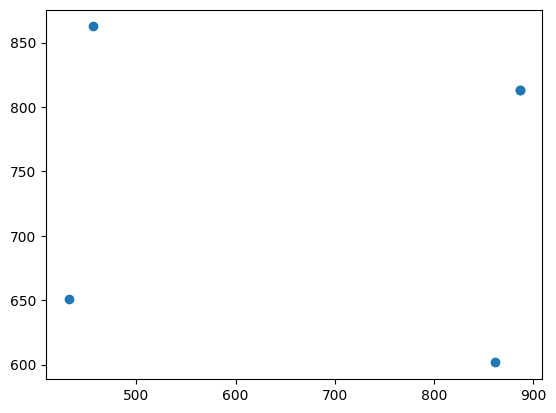

In [38]:
plt.scatter(bounding_rect_genom_rotated.boundary.coords.xy[0], bounding_rect_genom_rotated.boundary.coords.xy[1])

In [39]:
# points
# valid_points = points

In [40]:
# points

In [41]:
# valid_points = [ rotate(point, ridge_angle, use_radians=True) for point in valid_points ]
POINTS

[(np.float64(451.647), np.float64(842.668)),
 (np.float64(451.647), np.float64(822.799)),
 (np.float64(451.647), np.float64(802.931)),
 (np.float64(451.647), np.float64(783.062)),
 (np.float64(451.647), np.float64(763.193)),
 (np.float64(451.647), np.float64(743.325)),
 (np.float64(451.647), np.float64(723.456)),
 (np.float64(451.647), np.float64(703.587)),
 (np.float64(451.647), np.float64(683.718)),
 (np.float64(451.647), np.float64(663.85)),
 (np.float64(471.516), np.float64(842.668)),
 (np.float64(471.516), np.float64(822.799)),
 (np.float64(471.516), np.float64(802.931)),
 (np.float64(471.516), np.float64(783.062)),
 (np.float64(471.516), np.float64(763.193)),
 (np.float64(471.516), np.float64(743.325)),
 (np.float64(471.516), np.float64(723.456)),
 (np.float64(471.516), np.float64(703.587)),
 (np.float64(471.516), np.float64(683.718)),
 (np.float64(471.516), np.float64(663.85)),
 (np.float64(491.385), np.float64(842.668)),
 (np.float64(491.385), np.float64(822.799)),
 (np.float64

In [42]:
# points = [(p.x, p.y) for p in valid_points]
points = [shapely.Point(p) for p in POINTS]
valid_points = []
valid_points.extend(filter(prep_polygon.contains, points))

In [43]:
points = [[p.x, p.y] for p in valid_points]
p_x, p_y = extract_x_y(points)
points

[[451.647, 743.325],
 [451.647, 723.456],
 [451.647, 703.587],
 [451.647, 683.718],
 [471.516, 822.799],
 [471.516, 802.931],
 [471.516, 783.062],
 [471.516, 763.193],
 [471.516, 743.325],
 [471.516, 723.456],
 [471.516, 703.587],
 [471.516, 683.718],
 [491.385, 822.799],
 [491.385, 802.931],
 [491.385, 783.062],
 [491.385, 763.193],
 [491.385, 743.325],
 [491.385, 723.456],
 [491.385, 703.587],
 [491.385, 683.718],
 [511.253, 822.799],
 [511.253, 802.931],
 [511.253, 783.062],
 [511.253, 763.193],
 [511.253, 743.325],
 [511.253, 723.456],
 [511.253, 703.587],
 [511.253, 683.718],
 [531.122, 822.799],
 [531.122, 802.931],
 [531.122, 783.062],
 [531.122, 763.193],
 [531.122, 743.325],
 [531.122, 723.456],
 [531.122, 703.587],
 [531.122, 683.718],
 [550.991, 822.799],
 [550.991, 802.931],
 [550.991, 783.062],
 [550.991, 763.193],
 [550.991, 743.325],
 [550.991, 723.456],
 [550.991, 703.587],
 [550.991, 683.718],
 [550.991, 663.85],
 [570.86, 822.799],
 [570.86, 802.931],
 [570.86, 783.06

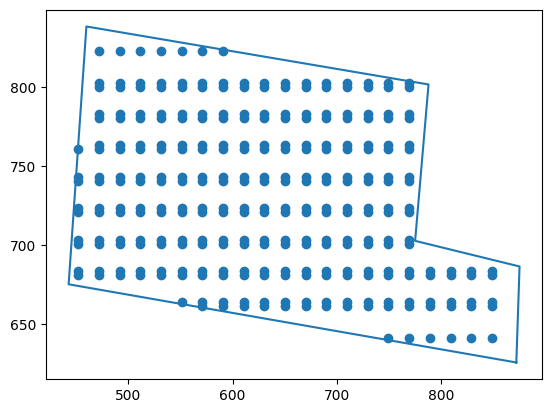

In [44]:
plt.scatter(p_x,p_y)
plt.plot(x,y)

In [45]:
# find the equal distances on ridge side
# find the bounding box 
# find the diagonal length of the bounding box
# find the perpendicular lines to the ridge on each starting point of length of diagonal
# divide the each line to equal parts of height of panel
# take all these points and validate with roof_polygon
diagonal = shapely.LineString([P2, P4])
diag_len = diagonal.length
ridge_line = shapely.LineString(ridge)

In [46]:
panel_width = 60
panel_height = 60
points_on_ridge = get_points_at_eq_distance(ridge, panel_width)['points']


In [47]:
total_points = []
for pt in points_on_ridge:
    vertical_line_end = calc_perpendicular(ridge, pt, -diag_len)
    vertical_line = [  vertical_line_end, pt ]
    vertical_pts = get_points_at_eq_distance(vertical_line, panel_height)['points']
    total_points.extend(vertical_pts)


In [48]:
# total_points.extend(points_on_ridge)

In [49]:
pt_x, pt_y = extract_x_y(total_points)

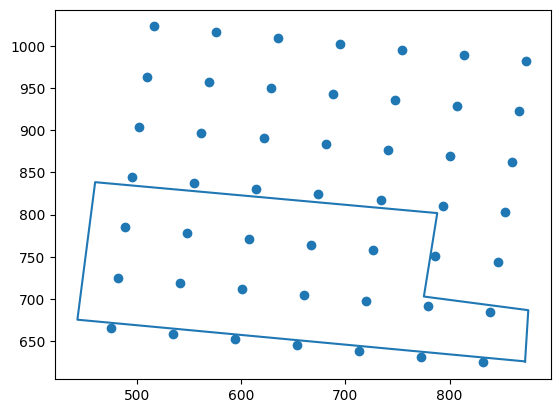

In [50]:
plt.scatter(pt_x, pt_y)
plt.plot(x,y)

In [51]:
prep_polygon = prep(polygon)

In [52]:
points = [shapely.Point(p) for p in total_points]

In [53]:
valid_points = []
# # # the prepared polygon
valid_points.extend(filter(prep_polygon.contains, points))

In [54]:
prep_polygon.contains

<bound method PreparedGeometry.contains of <shapely.prepared.PreparedGeometry object at 0x0000014971CDB380>>

In [55]:
pts_x, pts_y = extract_x_y([(p.x, p.y) for p in valid_points])

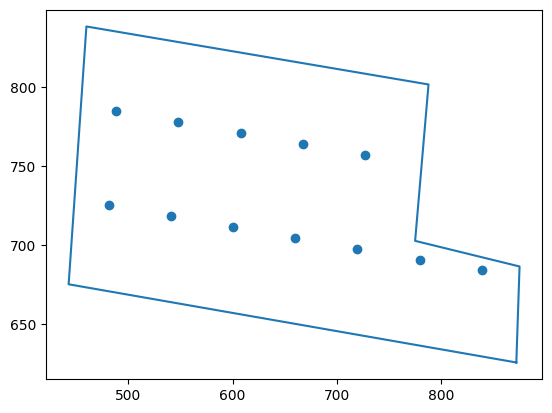

In [56]:
plt.scatter(pts_x, pts_y)
plt.plot(x,y)

In [57]:
# find the side of the bounding box which will be on the ridge side
rotated_boundary = lt_rotated.boundary.coords.xy
rotated_boundary

(array('d', [456.1106376308264, 431.7785269008154, 862.0167691660627, 886.3488798960739, 456.1106376308264]),
 array('d', [862.5369156064284, 651.2080279698515, 601.671002207968, 812.9998898445448, 862.5369156064284]))